# Images in Matplotlib
---

In [3]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [6]:
img = mpimg.imread('./stinkbug.webp')
print(img)

[[[104 104 104]
  [104 104 104]
  [104 104 104]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[105 105 105]
  [105 105 105]
  [105 105 105]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[107 107 107]
  [106 106 106]
  [106 106 106]
  ...
  [110 110 110]
  [110 110 110]
  [110 110 110]]

 ...

 [[112 112 112]
  [111 111 111]
  [110 110 110]
  ...
  [116 116 116]
  [115 115 115]
  [115 115 115]]

 [[113 113 113]
  [113 113 113]
  [112 112 112]
  ...
  [115 115 115]
  [114 114 114]
  [114 114 114]]

 [[113 113 113]
  [115 115 115]
  [115 115 115]
  ...
  [114 114 114]
  [114 114 114]
  [113 113 113]]]


In [7]:
img.shape

(375, 500, 3)

In [10]:
# The first three pixels in the first three rows
img[:3, :3, :]

array([[[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106]]], dtype=uint8)

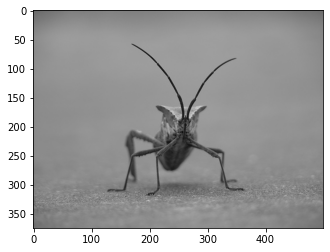

In [8]:
imgplot = plt.imshow(img)

## Let’s mess with this image 🤡
---

I want to manually change a few pixels to better understand the structure of the NumPy array `matplotlib.image.imread` returns.

In [12]:
img[:3, :3, :] = [250, 250, 250]

ValueError: assignment destination is read-only

I’m getting “`ValueError: assignment destination is read-only`”. Seems like I can’t mutate this array? Let’s get some info about the memory layout of this array:

In [14]:
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

`WRITEABLE` is `False`. Huh. That’s surely not the case for a regular vanilla NumPy array?

In [22]:
a = np.arange(0, 1000).reshape(10, 10, 10)
print(f"a.shape: {a.shape}")
print(f"a.flags['WRITEABLE']: {a.flags['WRITEABLE']}")

a.shape: (10, 10, 10)
a.flags['WRITEABLE']: True


Let’s make a copy of the image array, and see if that makes it `WRITEABLE`:

In [30]:
img_copy = img.copy()
img_copy.flags['WRITEABLE']

True

It does, great. Let’s proceed and **mess with the pixels!!!**

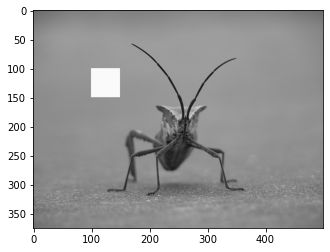

In [31]:
img_copy[100:150, 100:150, :] = [250, 250, 250]
plt.imshow(img_copy)

It’s working!!! 💥🚀

## Apply pseudocolor schemes to image plots
---

Grab just one channel to get a luminosity image. It doesn’t matter which channel you grab, because each channel has the same exact value for each pixel right now.

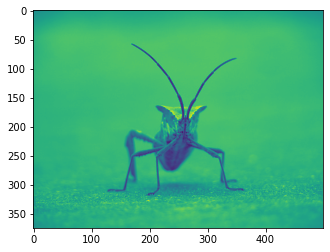

In [33]:
lum_img = img[:, :, 0]

plt.imshow(lum_img)

Change the colormap property `cmap` to change the appearance of our luminosity (2D, no color) image.

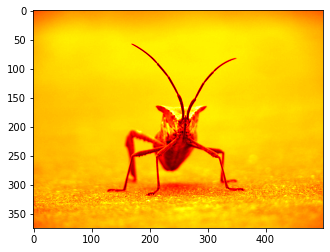

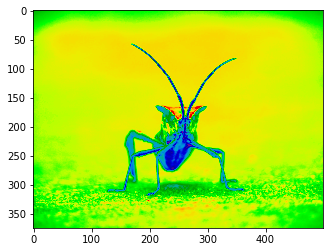

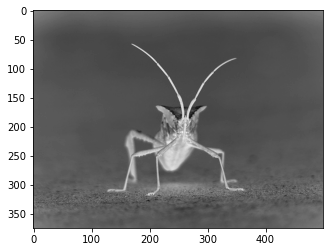

In [42]:
plt.imshow(lum_img, cmap="hot")
plt.show()
plt.imshow(lum_img, cmap="nipy_spectral")
plt.show()
plt.imshow(lum_img, cmap="binary")
plt.show()

We passed the `cmap` as an argument to `imshow` above. You can also `set_cmap` on an `AxesImage` object that gets returned by `imshow`:

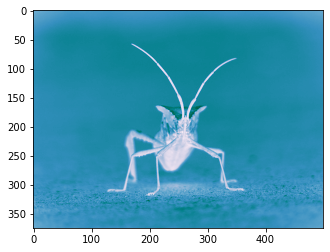

In [45]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('PuBuGn')

### Add a color scale reference
---

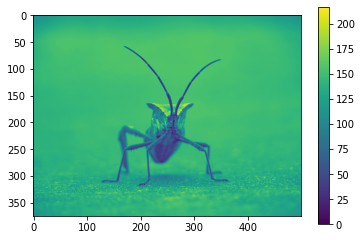

In [47]:
imgplot = plt.imshow(lum_img)
plt.colorbar()